In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error as mae

In [2]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
scaled_x=scaled.fit_transform(x)
x=pd.DataFrame(scaled_x,columns=x.columns)

In [5]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,random_state=50,stratify=y)
from sklearn.metrics import f1_score as ff

In [6]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn=KNN(n_neighbors=9)
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
ff(pred,test_y)

0.7317073170731708

In [7]:
l=[]
for i in range(1,20):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    pred=knn.predict(test_x)
    x=ff(pred,test_y)
    err=1-x
    l.append(err)


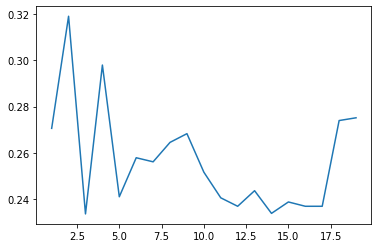

In [8]:
x=pd.DataFrame({'K_VALUE':range(1,20),'ERROR':l})
plt.plot(x['K_VALUE'],x['ERROR'])

In [9]:
knn=KNN(n_neighbors=3)
knn.fit(train_x,train_y)
pred=knn.predict(test_x)
ff(pred,test_y)

0.7664670658682634

In [10]:
df=pd.read_csv('data_cleaned.csv')
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [11]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [12]:
from sklearn.preprocessing import StandardScaler
scaled=StandardScaler()
scled_x=scaled.fit_transform(x)
x=pd.DataFrame(scled_x,columns=x.columns)

In [13]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,random_state=96,stratify=y)

In [14]:
from sklearn.model_selection import cross_val_score as cc
from sklearn.neighbors import KNeighborsClassifier as KNN
score=cc(KNN(n_neighbors=1),X=train_x,y=train_y,cv=10)
score

array([0.68656716, 0.67164179, 0.7761194 , 0.73134328, 0.62686567,
       0.71641791, 0.85074627, 0.79104478, 0.81818182, 0.6969697 ])

In [15]:
score.mean()*100


73.65897783808232

In [16]:
score.std()*100

6.706785119259538

In [17]:
mean=[]
std=[]
for i in range(1,20):
    score=cc(knn(n_neighbors=i),X=train_x,y=train_y,cv=10)
    mean.append(score.mean())
    std.append(score.std())

TypeError: 'KNeighborsClassifier' object is not callable

In [ ]:
z=pd.DataFrame({'KNN':range(1,20),'MEAN':mean,'DEV':std})
z

In [ ]:
plt.plot(z['KNN'],z['MEAN'])

In [ ]:
plt.plot(z['KNN'],z['DEV'])

In [ ]:
score=cc(knn(n_neighbors=14),X=train_x,y=train_y,cv=10)
score
score.mean()

In [ ]:
knn=KNN(n_neighbors=14)
knn.fit(train_x,train_y)
knn.score(test_x,test_y)

In [ ]:
knn.score(train_x,train_y)

In [ ]:
experience = [1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]
salary     = [1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2]

df = pd.DataFrame({
    "salary" : salary,
    "experience"   : experience
})
df.head()

In [ ]:
beta=1.0
b=0.8
l=[]
x=df['experience']
for i in range(len(x)):
    c=x[i]*beta+b
    l.append(c)
plt.scatter(df['experience'],df['salary'],color='red',marker='o')
plt.plot(df['experience'],l,color='red')
plt.grid()

In [ ]:
from sklearn.metrics import mean_squared_error as mae

In [ ]:
score=mae(df['salary'],l)
score

In [ ]:
score=mae(df['salary'],df['experience'])
score

In [19]:
df=pd.read_csv('train_cleaned.csv')
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.930,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,8.380,0.046982,108.1570,2002,549.2850,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
8520,10.600,0.035186,85.1224,2004,1193.1136,0,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,7.210,0.145221,103.1332,2009,1845.5976,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


In [20]:
x=df.drop(['Item_Outlet_Sales'],axis=1)
y=df['Item_Outlet_Sales']

In [21]:
from sklearn.model_selection import train_test_split as tt
train_x,test_x,train_y,test_y=tt(x,y,random_state=56)

In [22]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(train_x,train_y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
predict=lr.predict(train_x)
score=mae(predict,train_y)
score

821.4206146753693

In [24]:
predict1=lr.predict(test_x)
score1=mae(predict1,test_y)
score1

875.2688982985256

In [25]:
data=pd.DataFrame({'predicted':predict1,'Actual':test_y,'Residual':test_y-predict1})
data

,predicted,Actual,Residual
2172,906.204648,697.7584,-208.446248
6228,2544.719495,1414.1592,-1130.560295
2404,3008.957438,3078.6592,69.701762
99,3045.197114,1314.2892,-1730.907914
4945,1453.011713,1403.5064,-49.505313
...,...,...,...
3327,1761.717256,2013.3792,251.661944
6445,1574.742084,1182.4608,-392.281284
586,1340.917091,665.8000,-675.117091
1999,1627.882453,193.0820,-1434.800453


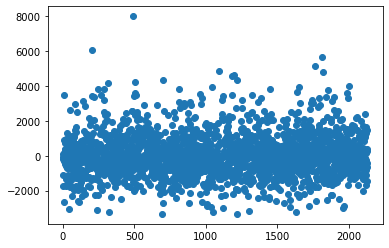

In [26]:
plt.scatter(range(0,2131),data['Residual'])

In [28]:
g=lr.coef_
g.res

array([ 1.78450035e-01, -3.84642222e+02,  1.54980674e+01, -1.84444754e+01,
       -3.78808067e+01,  3.31502849e+01,  4.06819896e+01,  4.76424149e+01,
       -8.35938826e+01,  2.81126002e+00, -1.19848265e+00, -1.57618523e+02,
        6.71387323e+01, -5.33492180e+01, -3.06556852e+01,  4.23212148e+01,
       -2.30260247e+01, -4.27876198e+01, -7.54301779e+01, -3.65824873e+00,
       -7.87129822e+01,  2.60470952e+02,  1.41600650e+01, -1.46932400e+01,
        9.42279781e+01, -4.64999137e+02, -5.51947683e+01,  1.53301072e+02,
       -4.68181522e+01, -4.71597876e+02,  5.87820902e+02,  1.24396682e+02,
       -8.80903933e+01,  3.17298874e+02, -5.61172040e+01, -5.51947683e+01,
        4.84885546e+02, -2.99023193e+01, -2.10416205e+02,  1.89607361e+02,
        2.08088447e+01, -9.36597012e+02,  3.95594262e+02, -4.68181522e+01,
        5.87820902e+02])

In [ ]:
plt.figure(figsize=(12,6),edgecolor='w',facecolor='g',dpi=120)
plt.bar(range(len(x.columns)),g)

In [ ]:
lr=LinearRegression(normalize=True)
lr.fit(train_x,train_y)
predict1=lr.predict(train_x)
predict=lr.predict(test_x)
score=mae(predict,test_y)
score

In [18]:
score=mae(predict1,train_y)
score
g=lr.coef_
g

NameError: name 'predict1' is not defined

In [ ]:
plt.bar(range(len(x.columns)),g)

In [ ]:
graph=pd.DataFrame({'columns':x.columns,'coefficient':lr.coef_})
graph

In [ ]:
new=graph[graph['coefficient']>0.5]


In [ ]:
new_=df[new['columns'].values]
new_

In [ ]:
from sklearn.model_selection import train_test_split as tt
from sklearn.linear_model import LinearRegression as LR
train_x,test_x,train_y,test_y=tt(new_,y,random_state=56)

In [ ]:
lr=LR()
lr.fit(train_x,train_y)
predict=lr.predict(train_x)
score=mae(predict,train_y)
score
g=lr.coef_
score

In [ ]:
plt.bar(range(len(new_.columns)),g)